# Figure 4
Plot for future devil population with no intervention

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../GillesPy2')))

In [2]:
import pickle
import numpy as np

In [3]:
from gillespy2 import TauHybridCSolver

In [4]:
from dask.distributed import Client
from dask import delayed

In [5]:
sys.path.insert(2, os.path.abspath(os.path.join(os.getcwd(), './ParameterSweeps')))
from Devils_DFTD_2_Stage_Infection import DevilsDFTD2StageInfection
from Simulation import Simulation, devil_pop

In [6]:
c = Client(n_workers=8, threads_per_worker=1)
# c = Client("james.cs.unca.edu:12345")

/opt/homebrew/lib/python3.9/site-packages/distributed/node.py:181: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50308 instead
  warnings.warn(


## Run Simulation for No Interventions

In [7]:
def load_simulation(data_path):
    if os.path.exists(data_path):
        with open(data_path, "rb") as data_file:
            sim = pickle.load(data_file)
        return Simulation.load_state(sim)
    
    model = DevilsDFTD2StageInfection(devil_pop)
    model.timespan(np.arange(0, 1001, 1))
    
    sol = delayed(TauHybridCSolver)(model=model, variable=True)
    
    sim = Simulation(model)
    sim.configure(solver=sol)
    return sim

In [8]:
data_path = "figure_data/Fig4-data.p"

In [9]:
sim = load_simulation(data_path)

In [10]:
%time _ = sim.run(use_existing_results=True)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


In [11]:
if not os.path.exists(data_path):
    with open(data_path, "wb") as data_file:
        pickle.dump(sim, data_file)

## Plot for Figure 4

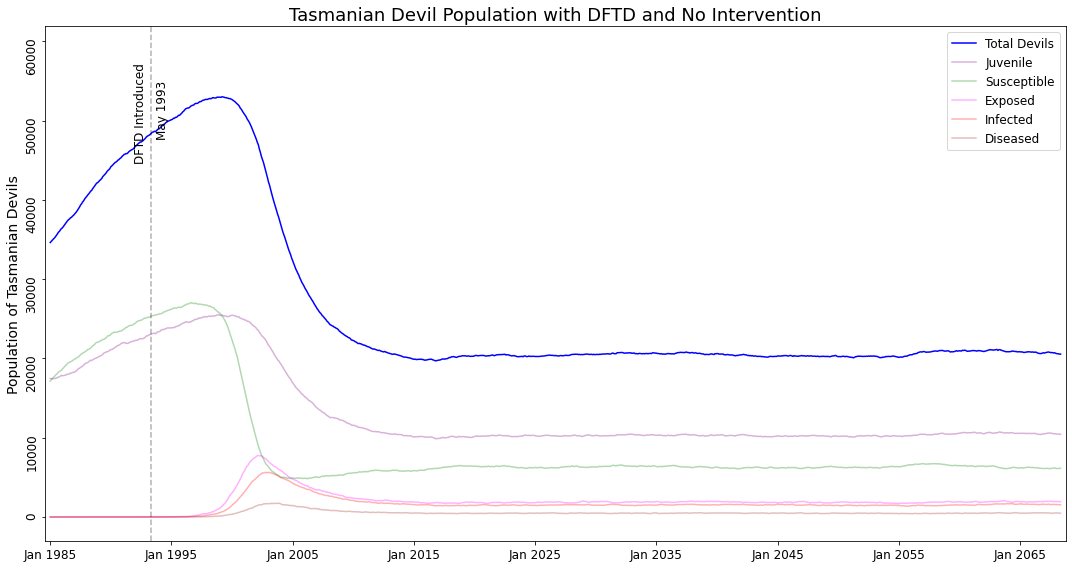

In [12]:
sim.plot()

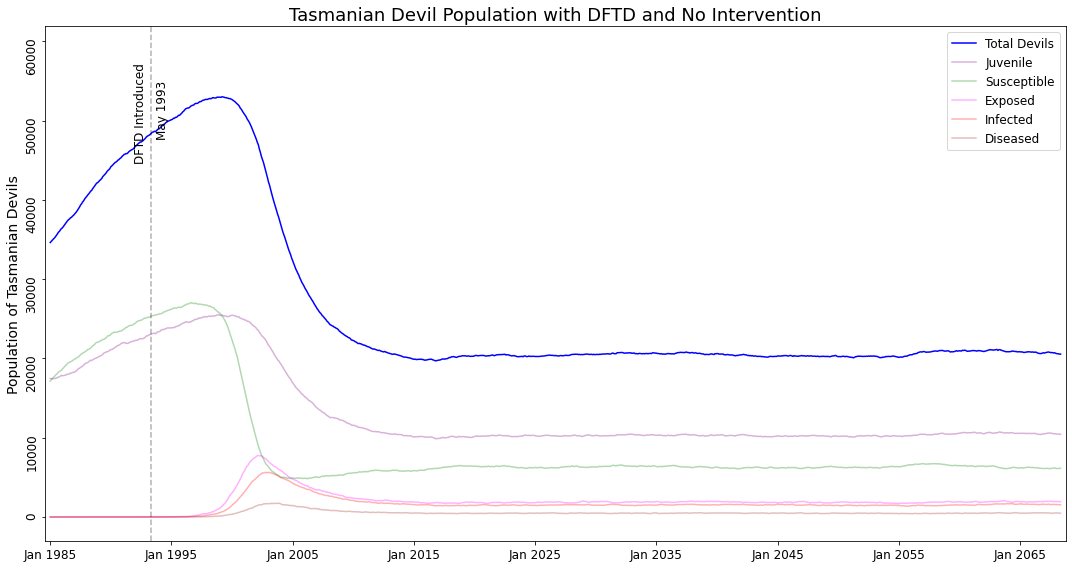

In [13]:
sim.plot(save_fig="figures/DFTDmodel_sec4_no_intervention.pdf")

In [14]:
c.close()